In [14]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np

In [5]:
base = pd.read_csv('credit_card_clients.csv', header=1)

In [6]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
base['BILL_TOTAL'] = base['BILL_AMT1'] + base['BILL_AMT2'] + base['BILL_AMT3'] + base['BILL_AMT4'] + base['BILL_AMT5'] + base['BILL_AMT6']

In [18]:
X = base.iloc[:, [1, 25]].values
X[:5]

array([[ 20000,   7704],
       [120000,  17077],
       [ 90000, 101653],
       [ 50000, 231334],
       [ 50000, 109339]], dtype=int64)

In [19]:
scaler = StandardScaler()

In [20]:
X = scaler.fit_transform(X)

C:\Users\ricar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [27]:
dbscan = DBSCAN(eps = 0.37, min_samples=4)

In [28]:
previsoes = dbscan.fit_predict(X)

In [29]:
unicos, quantidade = np.unique(previsoes, return_counts=True)
print(unicos)
print(quantidade)

[-1  0  1  2]
[   42 29931    18     9]


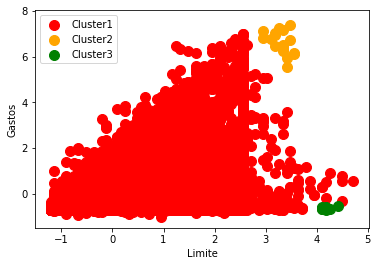

In [30]:
plt.scatter(X[previsoes == 0, 0], X[previsoes == 0, 1], s=100, c='red', label='Cluster1')
plt.scatter(X[previsoes == 1, 0], X[previsoes == 1, 1], s=100, c='orange', label='Cluster2')
plt.scatter(X[previsoes == 2, 0], X[previsoes == 2, 1], s=100, c='green', label='Cluster3')
plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend()